# Heart Stroke prediction - Machine Learning approach

### Introduction

According to the World Health Organisation, Cardiovascular Diseases (CVDs) remain to be the main cause of death worldwide.  Thus, identifying individuals at risk of stroke is crucial for preventive interventions and improving health outcomes. Machine learning techniques offer promising avenues for stroke prediction by analyzing various risk factors and their interactions. In this study, a machine learning approach is presented for heart stroke prediction based on demographic, lifestyle, and clinical features.

## Data Preview

In [490]:
import pandas as pd 
import numpy as np 
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import matplotlib

In [491]:
matplotlib.use('TkAgg')

In [492]:
# Set the display format for floating-point numbers
pd.set_option('display.float_format', '{:.4f}'.format)

In [493]:
# load data
stroke_data = pd.read_csv('data/stroke_data.csv')
stroke_data.sample(10)

,id,age,avg_glucose_level,bmi,ever_married,feat01,feat02,feat03,feat04,feat05,...,feat08,feat09,feat10,gender,heart_disease,hypertension,Residence_type,smoking_status,stroke,work_type
1927,1928,4.0000,61.5400,13.2000,No,0.3036,0.4174,0.5848,0.7220,1.3879,...,0.8802,1.4959,0.5728,Female,0,0,Urban,Unknown,0,children
2324,2325,59.0000,135.8400,27.3000,Yes,0.5148,0.4452,1.1732,1.2483,0.9464,...,0.7054,0.7811,0.5366,Male,0,0,Urban,never smoked,0,Private
1988,1989,80.0000,148.7200,28.7000,Yes,0.6240,0.4765,0.9185,1.1870,1.6108,...,0.9372,0.9529,0.5015,Male,0,0,Urban,never smoked,0,Govt_job
4496,4497,64.0000,78.4500,27.0000,Yes,0.4009,0.6098,0.8156,1.2832,1.0928,...,0.4636,0.9152,0.5389,Female,0,0,Rural,formerly smoked,0,Private
2126,2127,44.0000,188.1300,44.7000,Yes,0.6826,0.4573,1.0527,1.1795,0.2854,...,0.5100,1.2524,0.5280,Male,0,1,Rural,formerly smoked,0,Self-employed
5213,5214,17.0000,67.8100,55.7000,No,0.4785,0.4568,0.5758,0.3453,1.1531,...,0.8476,0.6131,0.3467,Female,0,0,Urban,never smoked,0,Private
1119,1120,38.0000,162.7200,31.9000,No,0.4760,0.6677,1.1260,0.9474,1.0457,...,0.7669,1.0131,0.5675,Male,0,0,Rural,smokes,0,Private
2987,2988,36.0000,74.6300,31.6000,Yes,0.4409,0.5453,0.9240,0.9969,1.3747,...,0.6710,1.3758,0.3910,Male,0,0,Rural,formerly smoked,0,Private
5224,5225,78.0000,107.1800,28.2000,Yes,0.5924,0.5622,0.6491,1.1484,1.6681,...,0.7697,1.4539,0.5429,Female,1,0,Urban,never smoked,0,Private
3633,3634,2.0000,112.9200,18.4000,No,0.4432,0.5744,0.9333,1.0127,0.7759,...,0.8601,1.2363,0.5408,Male,0,0,Urban,Unknown,0,children


In [494]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5359 non-null   int64  
 1   age                5359 non-null   float64
 2   avg_glucose_level  5359 non-null   float64
 3   bmi                5118 non-null   float64
 4   ever_married       5359 non-null   object 
 5   feat01             5359 non-null   float64
 6   feat02             5359 non-null   float64
 7   feat03             5359 non-null   float64
 8   feat04             5359 non-null   float64
 9   feat05             5359 non-null   float64
 10  feat06             5359 non-null   float64
 11  feat07             5359 non-null   float64
 12  feat08             5359 non-null   float64
 13  feat09             5359 non-null   float64
 14  feat10             5359 non-null   float64
 15  gender             5359 non-null   object 
 16  heart_disease      5359 

In [495]:
stroke_data.columns

Index(['id', 'age', 'avg_glucose_level', 'bmi', 'ever_married', 'feat01',
       'feat02', 'feat03', 'feat04', 'feat05', 'feat06', 'feat07', 'feat08',
       'feat09', 'feat10', 'gender', 'heart_disease', 'hypertension',
       'Residence_type', 'smoking_status', 'stroke', 'work_type'],
      dtype='object')

### Dataset Description

The data contains 5359 observations with 21 variables. 
* 13 numeric (float) features 
* 7 categorical or dummy features 
* dependent variable - stroke

Apart of these, we do not need to preserve `id` column, so it is immideately ommited.

In [496]:
# omit id column
stroke_data = stroke_data.drop(columns='id')

In [497]:
# rename residence type to lower case
stroke_data = stroke_data.rename(columns={'Residence_type': 'residence_type'})

## Exploratory Data Analysis

The Explanatory Data Analysis was performed with the help of ProfileReport, the detailed data description is available in an html file `classification_report.html`.

In [600]:
eda = ProfileReport(stroke_data, title='EDA Report', explorative=True)
eda.to_file("classification_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/irenaz/.pyenv/versions/3.9.18/lib/python3.9/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Yes'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [498]:
# column gender contains only one observation - 'Other'. As far as this will cause problem in test-train split, it is better to omit this observation
stroke_data = stroke_data[stroke_data['gender'] != 'Other']

## Stratified train-test sampling

Often in classification problems we face an issue of unbalanced sample from the perspective of dependent variable. In this case, it is important to verify whether the proportions of Y are preserved on approximately same level in both samples.

In [499]:
stroke_data.groupby('stroke')['stroke'].agg('count')/len(stroke_data)

stroke
0   0.9071
1   0.0929
Name: stroke, dtype: float64

So, indeed we have sample imbalance, with less than 10% positive cases in the dataset. Our objective is to have approximately 10% of heart strokes in train and test samples.

In [601]:
# the test data will contain 20% of observations

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(stroke_data.drop(columns = 'stroke'), 
                                                    stroke_data['stroke'], 
                                                    test_size=0.2, 
                                                    random_state=77,
                                                     stratify=stroke_data['stroke'])

In [602]:
# Verify Y distribution on train - approx. 10% (green light)
y_train.value_counts()/len(y_train)

stroke
0   0.9071
1   0.0929
Name: count, dtype: float64

In [603]:
# In test sample slightly less, around 9%, but we stay with that
y_test.value_counts()/len(y_test)

stroke
0   0.9067
1   0.0933
Name: count, dtype: float64

## Missing values

In [604]:
# Verify missing values in data
stroke_data.isna().sum()

age                    0
avg_glucose_level      0
bmi                  241
ever_married           0
feat01                 0
feat02                 0
feat03                 0
feat04                 0
feat05                 0
feat06                 0
feat07                 0
feat08                 0
feat09                 0
feat10                 0
gender                 0
heart_disease          0
hypertension           0
residence_type         0
smoking_status         0
stroke                 0
work_type              0
dtype: int64

The missing values can be imputed with `SimpleImputer` from sklearn. First, the imputer is fitted on train data and then the median from train data is imputed into the test set. 

In [605]:
from sklearn.impute import SimpleImputer
imputer =SimpleImputer(strategy="median")
imputer.fit(X_train.select_dtypes(exclude=['object'])[['bmi']])

SimpleImputer(strategy='median')

In [606]:
print(f'The median BMI in the train set is: {imputer.statistics_}')

The median BMI in the train set is: [28.2]


In [607]:
X_train[['bmi']] = imputer.transform(X_train[['bmi']])

In [608]:
X_test.isna().sum()

age                   0
avg_glucose_level     0
bmi                  40
ever_married          0
feat01                0
feat02                0
feat03                0
feat04                0
feat05                0
feat06                0
feat07                0
feat08                0
feat09                0
feat10                0
gender                0
heart_disease         0
hypertension          0
residence_type        0
smoking_status        0
work_type             0
dtype: int64

In [609]:
# the test set is imputed by the same number 
X_test[['bmi']] = imputer.transform(X_test[['bmi']])

## Tree-based feature selection

<Axes: >

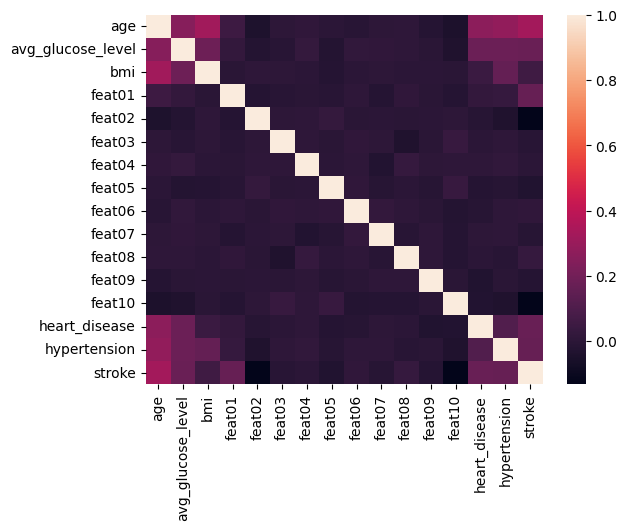

In [610]:
import seaborn as sns
%matplotlib inline


# calculate the correlation matrix on the numeric columns
corr = stroke_data.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)

### Factorization of categorical features

In [611]:
X_train_copy = X_train.copy()
cat_cols = X_train_copy.select_dtypes(include="object").columns

In [612]:
X_train_copy[cat_cols] = X_train_copy[cat_cols].apply(lambda x: pd.factorize(x)[0])

In [613]:
X_train_copy

,age,avg_glucose_level,bmi,ever_married,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat09,feat10,gender,heart_disease,hypertension,residence_type,smoking_status,work_type
642,25.0000,78.5000,28.6000,0,0.5501,0.5512,0.9769,0.7935,0.9129,0.8869,0.7857,1.1312,1.0039,0.3606,0,0,0,0,0,0
4569,2.0000,65.6700,16.6000,1,0.6519,0.3850,1.1433,0.5765,0.8822,0.4381,0.6455,0.5022,1.1878,0.6071,1,0,0,0,1,1
850,50.0000,85.7700,21.1000,1,0.5779,0.5911,1.4092,1.3742,1.4719,0.8751,0.4421,0.8501,0.8405,0.5462,0,0,0,1,0,0
3101,21.0000,62.9100,26.2000,1,0.1786,0.5615,0.8545,1.0786,1.3252,1.3142,1.1462,1.2625,1.1755,0.5893,1,0,0,0,0,0
5146,80.0000,105.9200,32.5000,0,0.5200,0.4529,1.1545,1.1751,0.9973,1.4479,1.2439,0.6091,1.1789,0.6046,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566,21.0000,56.7900,20.4000,1,0.4569,0.8000,0.7165,0.9644,0.8196,0.7785,0.9647,0.5541,0.8948,0.7893,1,0,0,1,1,0
1810,48.0000,85.5400,32.2000,0,0.8440,0.4854,1.0222,1.2437,0.9252,0.6257,0.9369,1.5341,0.6256,0.6614,1,0,0,1,3,0
1527,20.0000,98.5500,21.3000,1,0.2361,0.6066,1.0448,0.6806,1.2927,0.9326,1.3919,1.4709,0.4536,0.7013,0,0,0,1,0,0
1997,46.0000,114.4600,24.7000,0,0.7215,0.5697,1.4166,1.0823,0.5545,0.4543,1.4885,0.9647,1.2722,0.2298,1,0,0,0,2,0


In [614]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [615]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_copy, y_train)

RandomForestClassifier(random_state=0)

In [616]:
forest_importancies = pd.Series(forest.feature_importances_, index = X_train_copy.columns).sort_values(ascending=False)

In [617]:
forest_importancies.sort_values(ascending=False)

age                 0.1426
feat02              0.1251
feat01              0.0822
avg_glucose_level   0.0755
feat10              0.0746
bmi                 0.0538
feat03              0.0521
feat06              0.0519
feat04              0.0513
feat08              0.0505
feat05              0.0501
feat07              0.0495
feat09              0.0495
heart_disease       0.0177
smoking_status      0.0169
work_type           0.0149
hypertension        0.0137
ever_married        0.0113
residence_type      0.0088
gender              0.0080
dtype: float64

In [618]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

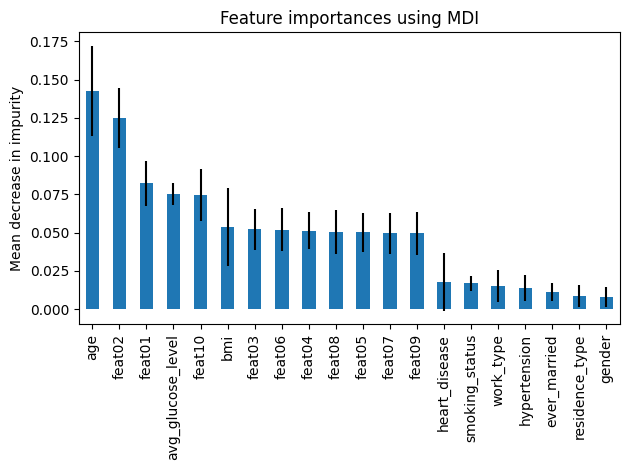

In [619]:
fig, ax = plt.subplots()
forest_importancies.plot.bar(yerr = std, ax = ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

In [620]:
X_test = X_test.drop(columns=['gender', 'residence_type'])
X_train = X_train.drop(columns=['gender', 'residence_type'])

## Feature Preprocessing Pipeline

In [621]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer

In [622]:
columns_to_bin = ['age', 'feat02', 'feat10', 'avg_glucose_level', 'feat01']

In [623]:
num_columns = X_train.select_dtypes(exclude = 'object').columns.to_list()
cat_columns = X_train.select_dtypes(include = 'object').columns.to_list()
bin_columns = columns_to_bin

In [624]:
for col in bin_columns:
    num_columns.remove(col)

print(num_columns)

['bmi', 'feat03', 'feat04', 'feat05', 'feat06', 'feat07', 'feat08', 'feat09', 'heart_disease', 'hypertension']


In [625]:
data_prep_pipeline = ColumnTransformer([
    ('num_binner', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile'), bin_columns),
    ('num', StandardScaler(), num_columns), 
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), cat_columns)
    
]).set_output(transform='pandas')

In [626]:
X_train = data_prep_pipeline.fit_transform(X_train)

In [627]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4286 entries, 642 to 904
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   num_binner__age                      4286 non-null   float64
 1   num_binner__feat02                   4286 non-null   float64
 2   num_binner__feat10                   4286 non-null   float64
 3   num_binner__avg_glucose_level        4286 non-null   float64
 4   num_binner__feat01                   4286 non-null   float64
 5   num__bmi                             4286 non-null   float64
 6   num__feat03                          4286 non-null   float64
 7   num__feat04                          4286 non-null   float64
 8   num__feat05                          4286 non-null   float64
 9   num__feat06                          4286 non-null   float64
 10  num__feat07                          4286 non-null   float64
 11  num__feat08                       

In [628]:
X_test = data_prep_pipeline.fit_transform(X_test)

In [629]:
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1072 entries, 4058 to 2000
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   num_binner__age                      1072 non-null   float64
 1   num_binner__feat02                   1072 non-null   float64
 2   num_binner__feat10                   1072 non-null   float64
 3   num_binner__avg_glucose_level        1072 non-null   float64
 4   num_binner__feat01                   1072 non-null   float64
 5   num__bmi                             1072 non-null   float64
 6   num__feat03                          1072 non-null   float64
 7   num__feat04                          1072 non-null   float64
 8   num__feat05                          1072 non-null   float64
 9   num__feat06                          1072 non-null   float64
 10  num__feat07                          1072 non-null   float64
 11  num__feat08                     

## Model Training

### Random Forest

In [630]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [631]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [3,5,7,11],  # Number of trees in the forest
    'max_features': [2,4,6,8,26],     # Number of features to consider at each split
    'max_depth': [3, 5, 7]       # Maximum depth of the tree # Minimum number of samples required to be at a leaf node
}

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_classifier, 
                                   param_distributions=param_dist, 
                                   n_iter=50,  # Number of parameter settings that are sampled
                                   scoring='f1',  # Use recall as the scoring metric
                                   cv=kfold,  # Number of cross-validation folds
                                   n_jobs=-1,  # Use all available CPU cores
                                   random_state=42)

# Perform RandomizedSearchCV
random_search.fit(X_train, y_train)  # Assuming you have X_train and y_train for training data

# Get the best estimator from the search
best_rf_classifier = random_search.best_estimator_

# Now you can use best_rf_classifier for prediction or evaluation

In [632]:
best_rf_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 26,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 5,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [633]:
rf_predictions = best_rf_classifier.predict(X_test)


In [634]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

precision_score(y_test, rf_predictions)



0.4888888888888889

In [635]:
recall_score(y_test, rf_predictions)

0.22

In [636]:
f1_score(y_test, rf_predictions)

0.30344827586206896

In [637]:
roc_auc_score(y_test, rf_predictions)

0.5981687242798354

### AdaBoost 

In [638]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

model_adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state=42, algorithm='SAMME.R')

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [3, 5, 7, 11, 100, 300],  # Number of gradient boosted trees
    'learning_rate': [0.01, 0.05, 0.1, 0.5],  # Boosting learning rate
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model_adaboost, 
                                   param_distributions=param_dist, 
                                   n_iter=50,  # Number of parameter settings that are sampled
                                   scoring='f1',  # Use recall as the scoring metric
                                   cv=kfold,  # Number of cross-validation folds
                                   n_jobs=-1,  # Use all available CPU cores
                                   random_state=42)

# Perform RandomizedSearchCV
random_search.fit(X_train, y_train)  # Assuming you have X_train and y_train for training data

# Get the best estimator from the search
best_ada_classifier = random_search.best_estimator_

/Users/irenaz/.pyenv/versions/3.9.18/lib/python3.9/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/irenaz/.pyenv/versions/3.9.18/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/irenaz/.pyenv/versions/3.9.18/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/irenaz/.pyenv/versions/3.9.18/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

In [639]:
best_ada_classifier.get_params()

{'algorithm': 'SAMME.R',
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': 1,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(max_depth=1),
 'learning_rate': 0.5,
 'n_estimators': 300,
 'random_state': 42}

In [640]:
ada_predictions = best_ada_classifier.predict(X_test)


In [641]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

precision_score(y_test, ada_predictions)



0.5510204081632653

In [642]:
recall_score(y_test, ada_predictions)

0.27

In [643]:
f1_score(y_test, ada_predictions)

0.3624161073825503

In [644]:
roc_auc_score(y_test, ada_predictions)

0.6236831275720165

## XGBoost

In [645]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [3, 5, 7, 10, 50, 70],  # Number of gradient boosted trees
    'learning_rate': [0.01, 0.05, 0.1],  # Boosting learning rate
    'max_depth': [3, 5], # Maximum depth of a tree
    'subsample' : [0.7, 0.8], 
    'gamma' : [0.7], 
    #'colsample_bytree' : [0.8], 
     'early_stopping_rounds': [20]
}

# Initialize XGBClassifier
xgb_classifier = XGBClassifier(random_state=42)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_classifier, 
                                   param_distributions=param_dist, 
                                   n_iter=15,  # Number of parameter settings that are sampled
                                   scoring='f1',  # Use recall as the scoring metric
                                   cv=kfold,  # Number of cross-validation folds
                                   n_jobs=-1,  # Use all available CPU cores
                                   random_state=42
                                )

# Perform RandomizedSearchCV
random_search.fit(X_train, y_train,
                #   , 
                   eval_set=[(X_test, y_test)], 
                #    early_stopping_rounds=10,  
                #    eval_metric='logloss', 
                #    verbose=False
                   )  

# Get the best estimator from the search
best_xgb_classifier = random_search.best_estimator_

# Now you can use best_xgb_classifier for prediction or evaluation
print(best_xgb_classifier.get_params())


[0]	validation_0-logloss:0.68605
[1]	validation_0-logloss:0.67896
[0]	validation_0-logloss:0.68596
[2]	validation_0-logloss:0.67215
[1]	validation_0-logloss:0.67895
[3]	validation_0-logloss:0.66537
[2]	validation_0-logloss:0.67218
[4]	validation_0-logloss:0.65885
[3]	validation_0-logloss:0.66540
[5]	validation_0-logloss:0.65239
[4]	validation_0-logloss:0.65877
[6]	validation_0-logloss:0.64595
[5]	validation_0-logloss:0.65225
[0]	validation_0-logloss:0.68592
[6]	validation_0-logloss:0.64592
[1]	validation_0-logloss:0.67893
[0]	validation_0-logloss:0.68594
[2]	validation_0-logloss:0.67210
[3]	validation_0-logloss:0.66535
[1]	validation_0-logloss:0.67898
[2]	validation_0-logloss:0.67207
[0]	validation_0-logloss:0.68601
[4]	validation_0-logloss:0.65877
[1]	validation_0-logloss:0.67896
[3]	validation_0-logloss:0.66536
[0]	validation_0-logloss:0.62548
[5]	validation_0-logloss:0.65231
[2]	validation_0-logloss:0.67210
[6]	validation_0-logloss:0.64596
[0]	validation_0-logloss:0.62419
[1]	valida

In [646]:
xgb_predictions = best_xgb_classifier.predict(X_test)


In [647]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

precision_score(y_test, xgb_predictions)



0.6

In [648]:
recall_score(y_test, xgb_predictions)

0.15

In [649]:
f1_score(y_test, xgb_predictions)

0.24

In [650]:
roc_auc_score(y_test, xgb_predictions)

0.5698559670781892

# Model Comparison

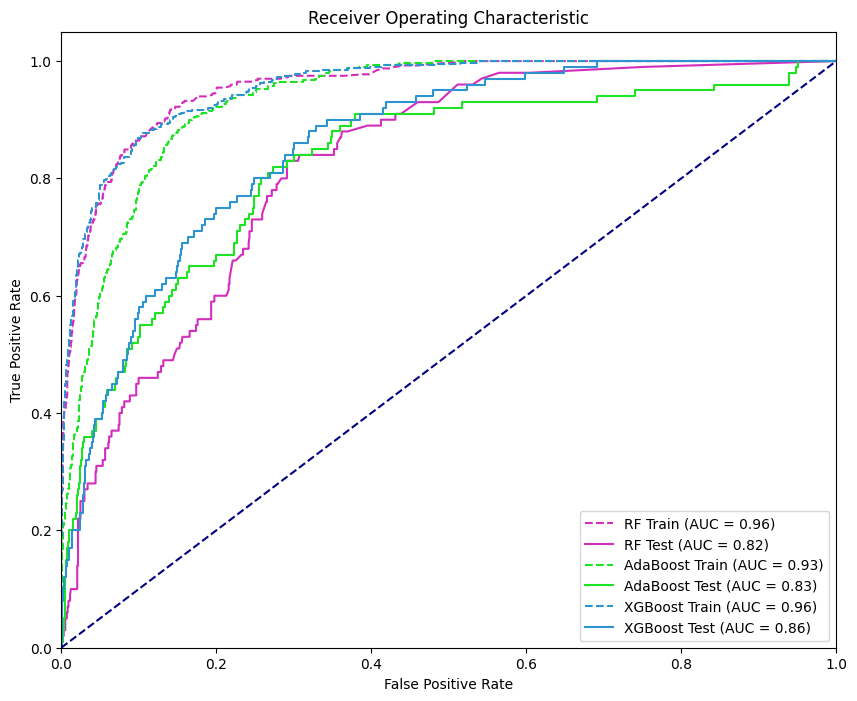

In [652]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have two models: model1, model2
# And your train and test data: X_train, y_train, X_test, y_test

models = [best_rf_classifier, best_ada_classifier, best_xgb_classifier]
model_names = ['RF', 'AdaBoost', 'XGBoost']
colors = ['#d22dbc', '#1ce323', '#2e94d1']  # colors for different models

plt.figure(figsize=(10, 8))

for i, model in enumerate(models):
    # Calculate ROC for training data
    y_train_pred = model.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Calculate ROC for test data
    y_test_pred = model.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Plot ROC for training data
    plt.plot(fpr_train, tpr_train, color=colors[i], linestyle='--', 
             label=f'{model_names[i]} Train (AUC = {roc_auc_train:.2f})')

    # Plot ROC for test data
    plt.plot(fpr_test, tpr_test, color=colors[i], linestyle='-', 
             label=f'{model_names[i]} Test (AUC = {roc_auc_test:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()